In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [111]:
data = pd.read_csv('student_scores - student_scores.csv')
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Text(0.5, 1.0, 'Hours Studied vs Scores')

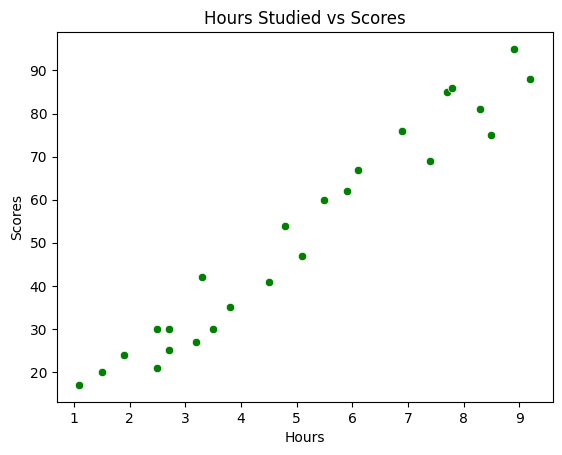

In [112]:
sns.scatterplot(data, x='Hours', y='Scores', color='green').set_title("Hours Studied vs Scores")

Now to split the dataset into training and testing dataset, we'll use train_test_spllit method that's provided with the sklearn package

In [113]:
X = data['Hours']
y = data['Scores']

In [114]:
x_train, x_test, y_train, y_test = tts(X, y, test_size=0.30, random_state=0)
x_train.describe()

count    17.000000
mean      5.370588
std       2.543316
min       1.100000
25%       3.300000
50%       5.100000
75%       7.700000
max       9.200000
Name: Hours, dtype: float64

In [115]:
x_test.describe()

count    8.000000
mean     4.250000
std      2.469818
min      1.500000
25%      2.350000
50%      3.500000
75%      6.275000
max      7.800000
Name: Hours, dtype: float64

Before we train the model, we need to transform our input data into a 2D array from a 1D array, to do this we use numpy's .reshape() method 

In [116]:
x_train = x_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)

Now to create and train the model on the training dataset

In [117]:
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

A Regression plot of how the model fits our data

Text(0.5, 1.0, 'Hours Studied vs Scores')

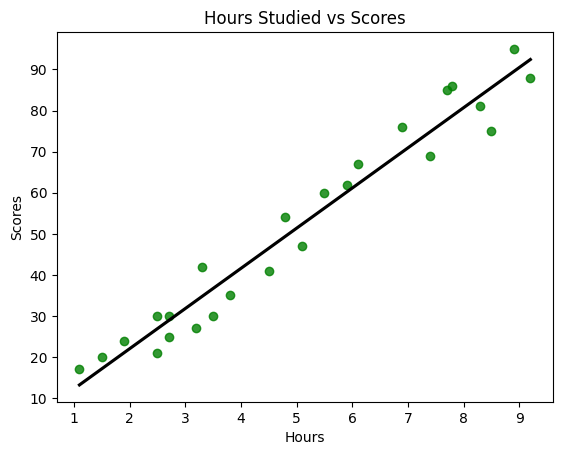

In [118]:
sns.regplot(data=data, x='Hours', y='Scores', ci=None, scatter_kws={"color": "green"}, line_kws={"color": "black"}).set_title("Hours Studied vs Scores")

Now to make predictions using our model on the testing data

In [119]:
y_pred = model.predict(x_test)
y_pred[:5]

array([17.05366541, 33.69422878, 74.80620886, 26.8422321 , 60.12335883])

We can now compare our model's predictions with the true output values for the testing data to see for ourselves. 

In [120]:
pd.DataFrame({"True Values": y_test, "Predicted Values": y_pred}).style.hide(axis='index')

True Values,Predicted Values
20,17.053665
27,33.694229
69,74.806209
30,26.842232
62,60.123359
35,39.567369
24,20.969092
86,78.721636


#### Evaluation

In [121]:
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))

Mean Absolute Error:  4.419727808027651


Predicted Score if a student studies for 9.25hrs a day:


In [140]:
hours = 9.25
hours = np.array(hours).reshape(1, -1)
prediction = model.predict(hours)
print(f"For {hours[0][0]} hours of studying, Model predicts the score to be: {prediction[0]} .")

For 9.25 hours of studying, Model predicts the score to be: 92.91505723477056 .
